In [99]:
# import both main files for house 1 and combine them into 1 dataframe

import numpy as np
import pandas as pd

main1 = open('low_freq/house_1/channel_1.dat')
main2 = open('low_freq/house_1/channel_2.dat')
channel1 = list()
channel2 = list()
for line in main1:
    channel1.append(line.split())
for line in main2:
    channel2.append(line.split())
df1 = pd.DataFrame(channel1)
df1.set_index(0, drop=True, inplace=True)
df2 = pd.DataFrame(channel2)
df2.set_index(0, drop=True, inplace=True)
df_main = df1.merge(df2, how='inner', left_index=True, right_index=True)
df_main.columns = ['main1', 'main2']

df_main.head()

,main1,main2
0,,
1303132929,224.19,118.63
1303132930,225.57,118.99
1303132931,226.09,119.05
1303132932,222.74,118.94
1303132933,222.20,118.83


In [100]:
# import the rest of the channels for house 1 (ie refrigerator, oven, etc) and
# combine into 1 dataframe to later merge with the main data frame

file = open('low_freq/house_1/channel_3.dat')
channel = list()
for line in file:
    channel.append(line.split())
df_channel = pd.DataFrame(channel)
df_channel.set_index(0, drop=True, inplace=True)

channel_no = 20 #3-20
for i in range(4, channel_no+1):
    file = open('low_freq/house_1/channel_' + str(i) + '.dat')
    channel = list()
    for line in file:
        channel.append(line.split())
    temp = pd.DataFrame(channel)
    temp.set_index(0, drop=True, inplace=True)
    df_channel = df_channel.merge(temp, how='left', right_index=True, left_index=True)

df_channel.columns = ['oven1','oven2','refrigerator','dishwasher','kitchen_outlets1','kitchen_outlets2',
                      'lighting1','washer_dryer1','microwave','bathroom_gfi','electric_heat','stove',
                      'kitchen_outlets3','kitchen_outlets4','lighting2','lighting3','washer_dryer2','washer_dryer3']
df_channel.head()

,oven1,oven2,refrigerator,dishwasher,kitchen_outlets1,kitchen_outlets2,lighting1,washer_dryer1,microwave,bathroom_gfi,electric_heat,stove,kitchen_outlets3,kitchen_outlets4,lighting2,lighting3,washer_dryer2,washer_dryer3
0,,,,,,,,,,,,,,,,,,
1303132933,0.00,0.00,6.00,0.00,34.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00
1303132936,0.00,0.00,6.00,0.00,34.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00
1303132940,0.00,0.00,6.00,0.00,34.00,22.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00
1303132943,0.00,0.00,6.00,1.00,35.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,1.00,0.00,65.00,46.00,0.00,0.00
1303132946,0.00,0.00,6.00,0.00,34.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00


In [101]:
# merge both main and channel dataframes and re-order columns

df_merged = df_channel.merge(df_main, how='left', right_index=True, left_index=True)
ordered = ['main1', 'main2', 'oven1','oven2','refrigerator','dishwasher','kitchen_outlets1','kitchen_outlets2',
                      'lighting1','washer_dryer1','microwave','bathroom_gfi','electric_heat','stove',
                      'kitchen_outlets3','kitchen_outlets4','lighting2','lighting3','washer_dryer2','washer_dryer3']
df_merged = df_merged[ordered]
df_merged.head()

,main1,main2,oven1,oven2,refrigerator,dishwasher,kitchen_outlets1,kitchen_outlets2,lighting1,washer_dryer1,microwave,bathroom_gfi,electric_heat,stove,kitchen_outlets3,kitchen_outlets4,lighting2,lighting3,washer_dryer2,washer_dryer3
0,,,,,,,,,,,,,,,,,,,,
1303132933,222.20,118.83,0.00,0.00,6.00,0.00,34.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00
1303132936,223.17,119.19,0.00,0.00,6.00,0.00,34.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00
1303132940,223.60,118.92,0.00,0.00,6.00,0.00,34.00,22.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00
1303132943,222.91,119.16,0.00,0.00,6.00,1.00,35.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,1.00,0.00,65.00,46.00,0.00,0.00
1303132946,222.94,118.83,0.00,0.00,6.00,0.00,34.00,21.00,81.00,0.00,5.00,1.00,0.00,0.00,2.00,0.00,65.00,46.00,0.00,0.00


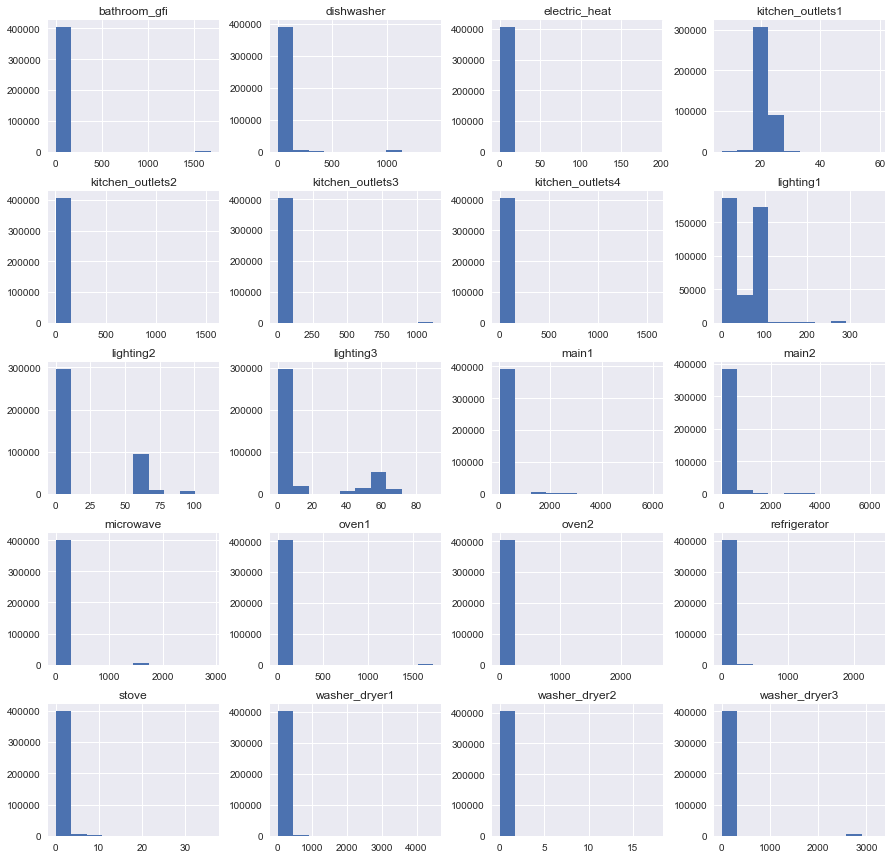

In [102]:
# convert all data into floating point numbers to be plotted then plot
import seaborn as sns
import matplotlib.pyplot as plt

df_merged = df_merged.apply(lambda x: pd.to_numeric(x), axis=0)
df_merged.dtypes

df_dropNAN = df_merged.copy().dropna(axis = 0, how='any')

df_dropNAN.hist(figsize=(15,15))
plt.show()

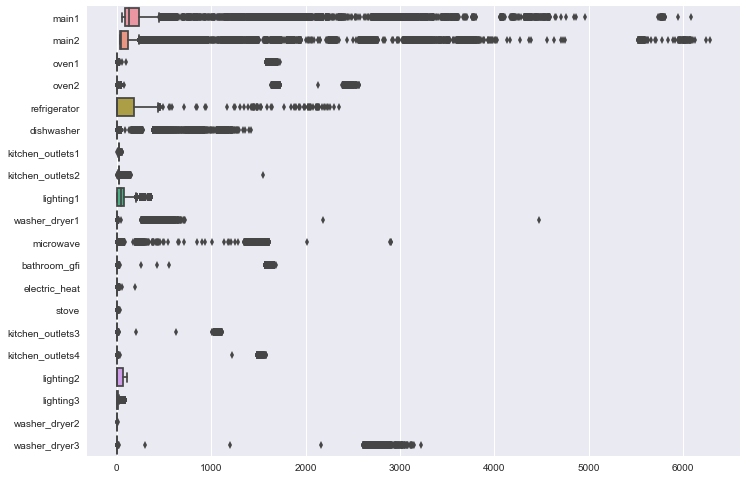

In [106]:
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
box = sns.boxplot(ax=ax, data=df_dropNAN, orient='h')
box

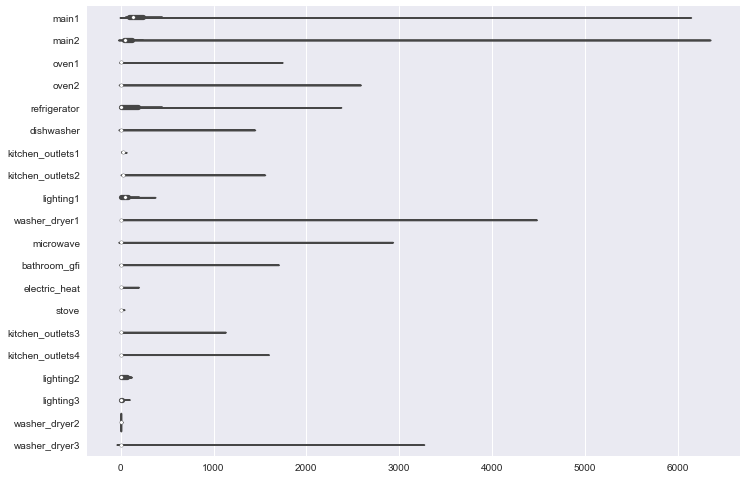

In [119]:
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
vio = sns.violinplot(ax=ax, data=df_dropNAN, orient='h')
vio